# Kernel Optimisation

In this notebook, we will study several method to get the best kernel for the MMD.

## Import modules

In [1]:
import os
os.chdir('..')
import Anomaly

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
from seaborn import kdeplot
from sklearn.metrics import roc_curve

In [3]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 8)

Populating the interactive namespace from numpy and matplotlib


## Test of estimators

In [12]:
law_p = Anomaly.utils.normal(0,1)
law_q = Anomaly.utils.normal(2,2)
kernel = Anomaly.kernels.gaussian(1)
MMD = Anomaly.MMD.OMMD
m = 1000
n = 100
alpha = 0.05

In [13]:
threshold = Anomaly.estimators.threshold_MC(kernel, law_p, law_p, m, n, alpha,  size_gen = 10, finalSampleSize=100)

Start computing first componant
Start computing second componanthevé % achevé % achevé % achevé % achevé
1.3850515974117141% achevéé % achevé % achevé% achevé % achevé % achevé % achevé


In [14]:
1-Anomaly.estimators.puissance_MC(MMD, kernel, law_p, law_p,m, n, threshold, repeat=1000)

0.04700000000000004

In [15]:
Anomaly.estimators.puissance_MC(MMD, kernel, law_p, law_q,m,n, threshold, repeat=1000)

0.001

## Courbe ROC

In [4]:
law_p = Anomaly.utils.normal(0,1)
law_q = Anomaly.utils.normal(1,1)
kernel = Anomaly.kernels.gaussian(.1)
m = 1000
n = 100

In [21]:
y = np.zeros(2000)
y[:1000] = 1
scores = np.zeros(2000)
scores[:1000] = Anomaly.estimators.sampleMMD_MC(MMD, kernel, law_p, law_q, m, n)
scores[1000:] = Anomaly.estimators.sampleMMD_MC(MMD, kernel, law_p, law_p, m, n)
fpr, tpr, thresholds = roc_curve(y, scores)

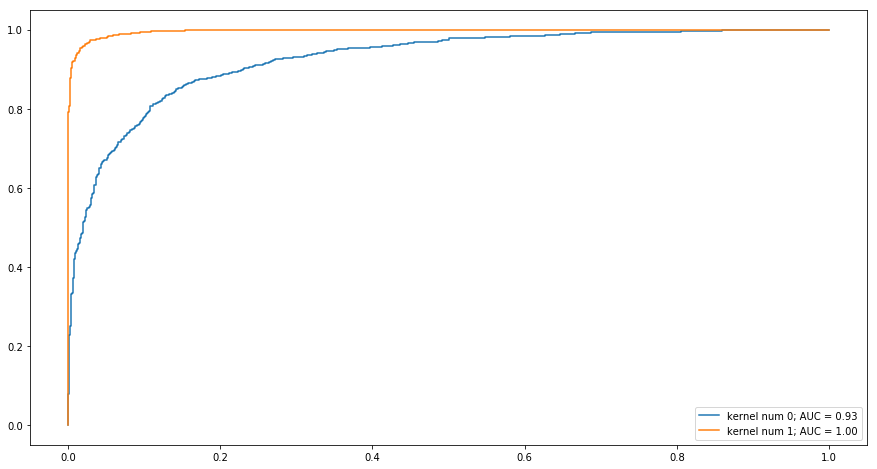

In [5]:
Anomaly.experiments.courbe_ROC([Anomaly.kernels.gaussian(.1),
                                Anomaly.kernels.gaussian(1)], law_p, law_q, m, n, sample_size=1000)

## grid Optimisation

In [4]:
law_p = Anomaly.utils.normal(0,1)
law_q = Anomaly.utils.normal(1,1)
Kernel = Anomaly.kernels.gaussian
m = 1000
n = 100
alpha = 0.05

Start computing sigma under H0
Start computing first componant
Start computing second componant
Start computing sigma under H1
Start computing first componant
Start computing second componant
Start computing Mean under H1
Start computing sigma under H0chevé % achevé
Start computing first componant
Start computing second componant
Start computing sigma under H1
Start computing first componant
Start computing second componant
Start computing Mean under H1
Start computing sigma under H0
Start computing first componant
Start computing second componant
Start computing sigma under H1
Start computing first componant
Start computing second componant
Start computing Mean under H1
Start computing sigma under H0achevé
Start computing first componant
Start computing second componant
Start computing sigma under H1
Start computing first componant
Start computing second componant
Start computing Mean under H1
Start computing sigma under H0
Start computing first componant
Start computing second compon

Start computing sigma under H0achevé % achevé
Start computing first componant
Start computing second componant
Start computing sigma under H1
Start computing first componant
Start computing second componant
Start computing Mean under H1
Start computing sigma under H0achevé
Start computing first componant
Start computing second componant
Start computing sigma under H1
Start computing first componant
Start computing second componant
Start computing Mean under H1
Start computing sigma under H0
Start computing first componant
Start computing second componant
Start computing sigma under H1
Start computing first componant
Start computing second componant
Start computing Mean under H1
Start computing sigma under H0
Start computing first componant
Start computing second componant
Start computing sigma under H1
Start computing first componant
Start computing second componant
Start computing Mean under H1


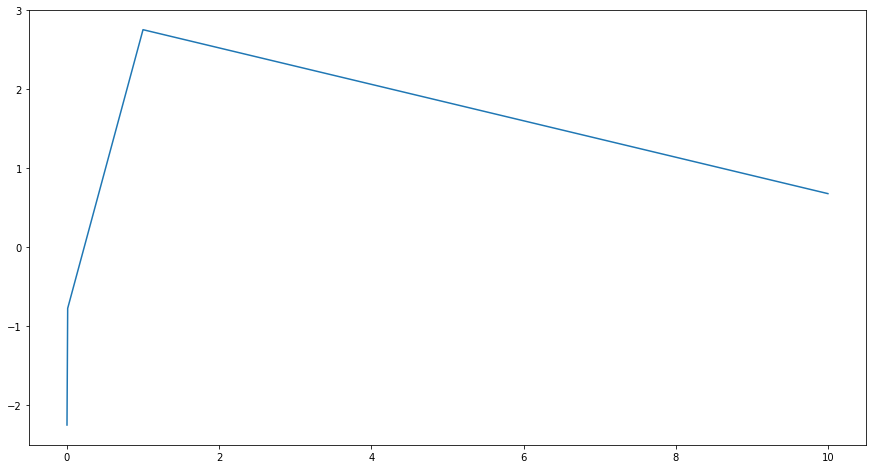

In [5]:
parameters = [0.001,0.01,1,10]
L = []
for s in parameters:
    kernel = Kernel(s)
    l = []
    for i in range(10):
        l.append(Anomaly.estimators.score_MC(kernel, law_p, law_q, m, alpha))
    L.append(np.mean(l))
plt.plot(parameters,L)

In [6]:
L

[-2.253431788674039,
 -0.7747602127323963,
 2.7561754930302635,
 0.6788721637805012]